# SARIMA(Seasonal ARIMA model)
* 定常時系列の解析に使うモデル
* ARIMAモデルに周期性を入れたモデル
* ハイパーパラメータの数  
ARIMAモデルは3個のパラメータを持っている  
ハイパーパラメータは時系列に対するARIMAモデルと季節差分に対するARIMAモデル，季節周期sの7個のパラメータがある
* 参考リンク  
https://logics-of-blue.com/python-time-series-analysis/

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### データの読み込み

In [18]:
# AirPassengersは外部のサイトからダウンロードする(https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv)
df = pd.read_csv('/workspace/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


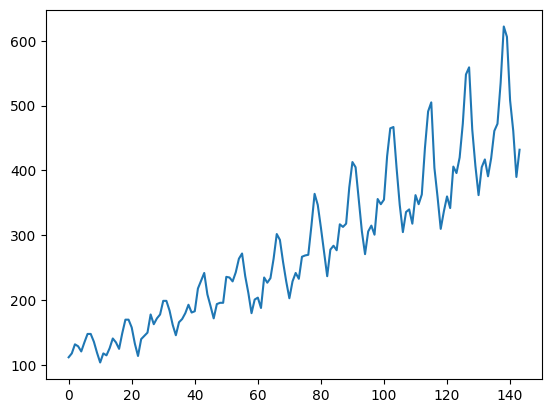

In [12]:
plt.plot(df['#Passengers'])
plt.show()

In [2]:
#res = sm.tsa.seasonal_decompose(df["#Passengers"])
#fig = res.plot()

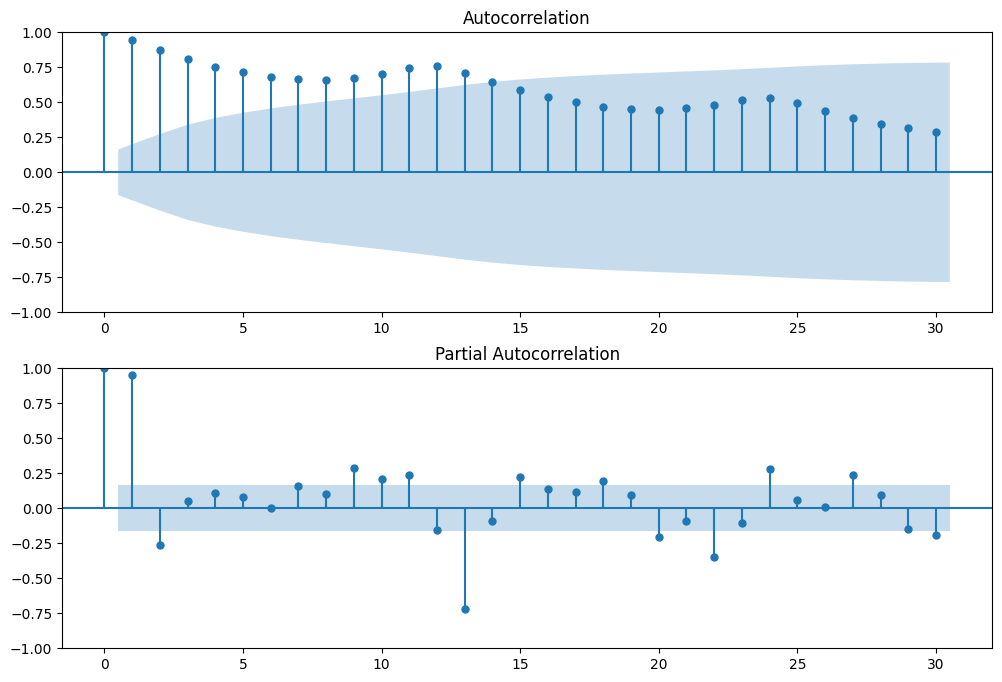

In [42]:
# コレログラム
# 自己相関
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["#Passengers"], lags=30, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["#Passengers"], lags=30, ax=ax2)

## 定常性の確認
* KPSS検定，ADF検定
* https://brskun.hatenablog.com/entry/2020/08/10/190305

In [13]:
res = sm.tsa.stattools.adfuller(df['#Passengers'])
print('p-value = {:.4}'.format(res[1]))

p-value = 0.9919


In [27]:
df_train = df[df['Month'] < '1957-04-01']
df_test = df[df['Month'] >= '1957-04-01']


ts = df['#Passengers']
ts_train = df_train['#Passengers']
ts_test = df_test['#Passengers']

## SARIMAモデル

In [22]:
# 各種パラメータの設定
order=(4,1,3)
seasonal_order=(1,1,1,12)


# モデルの設定
model = SARIMAX(endog = ts_train,
                order = order,
                seasonal_order=seasonal_order,
                #exog = sarimax_train, # このパラメータに外部の他の変数を追加することでSARIMAXになる
                enforce_stationarity=False,
                enforce_invertibility=False)



result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10237D+00    |proj g|=  3.32595D-01

At iterate    5    f=  2.66752D+00    |proj g|=  1.95711D-01

At iterate   10    f=  2.62325D+00    |proj g|=  2.29718D-01

At iterate   15    f=  2.61083D+00    |proj g|=  9.56300D-02


 This problem is unconstrained.



At iterate   20    f=  2.60328D+00    |proj g|=  1.86518D-02

At iterate   25    f=  2.60293D+00    |proj g|=  5.52731D-03

At iterate   30    f=  2.60268D+00    |proj g|=  1.85575D-02

At iterate   35    f=  2.60245D+00    |proj g|=  1.00481D-02

At iterate   40    f=  2.60227D+00    |proj g|=  1.40321D-02

At iterate   45    f=  2.59978D+00    |proj g|=  4.74871D-02

At iterate   50    f=  2.59298D+00    |proj g|=  1.31063D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.311D-01   2.593D+00
  F =   2.5929848125410273     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                  100
Model:             SARIMAX(4, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -259.298
Date:                              Sat, 10 Dec 2022   AIC                            538.597
Time:                                      01:54:21   BIC                            561.224
Sample:                                           0   HQIC                           547.595
                                              - 100                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6459      0.543      1.190      0.234      -0.418       1.710
ar.L2         -0.4229      0.514     -0.823      0.410      -1.430       0.584
ar.L3          0.2385      0.328      0.728      0.467      -0.404       0.881
ar.L4          0.1465      0.195      0.752      0.452      -0.235       0.528
ma.L1         -0.9385      0.538     -1.745      0.081      -1.993       0.116
ma.L2          0.6398      0.555      1.152      0.249      -0.448       1.728
ma.L3         -0.6503      0.348     -1.871      0.061      -1.332       0.031
ar.S.L12       0.0037      0.091      0.041      0.967      -0.174       0.181
ma.S.L12      -0.1719      0.153     -1.123      0.262      -0.472       0.128
sigma2        85.2417     16.468      5.176      0.000      52.966     117.518
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.83   Prob(JB):                         0.31
Heteroskedasticity (H):               1.00   Skew:                             0.44
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 出力結果

In [39]:
# 学習期間のデータにフィッティング
train_pred = result.predict()

# 未来のデータを予測
test_pred = result.forecast(len(ts_test))

# 予測区間の出力
test_pred_ci = result.get_forecast(len(ts_test)).conf_int()

# RMSEを出力
train_rmse = np.sqrt(mean_squared_error(ts_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(ts_test, test_pred))

print(f'RMSE(train): {train_rmse}')
print(f'RMSE(test): {test_rmse}')

RMSE(train): 17.174258218188424
RMSE(test): 26.06405234592171


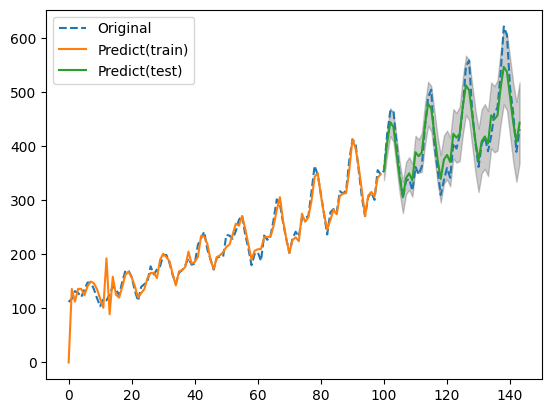

In [40]:
fig, ax = plt.subplots()
df["#Passengers"].plot(ax=ax, label='Original', linestyle="dashed")
train_pred.plot(ax=ax, label='Predict(train)')
test_pred.plot(ax=ax, label='Predict(test)')
ax.fill_between(
    test_pred_ci.index,
    test_pred_ci.iloc[:, 0],
    test_pred_ci.iloc[:, 1],
    color='k',
    alpha=.2)
ax.legend()

## SARIMAモデルのハイパラ探索
* https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/